# Author : Lukas Delaye
### This notebook only allows you to generate three probes to test the proper at the lyot stop level.

In [2]:
import os
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

import howfsc

In [3]:
# For mode = 'narrowfov'
howfscpath = os.path.dirname(os.path.abspath(howfsc.__file__))
modelpath = os.path.join(howfscpath, 'model', 'testdata', 'narrowfov')

probe0file = os.path.join(modelpath, 'narrowfov_dmrel_1.0e-05_cos.fits')
probe1file = os.path.join(modelpath, 'narrowfov_dmrel_1.0e-05_sinlr.fits')
probe2file = os.path.join(modelpath, 'narrowfov_dmrel_1.0e-05_sinud.fits')
sin0probe = fits.getdata(probe0file)
sin1probe = fits.getdata(probe1file)
sin2probe = fits.getdata(probe2file)

In [4]:
# Create single-actuator probes forming an "L" shape

dm_width = sin0probe.shape[1]
idx_max = np.argmax(sin0probe)

# Probe 0
act0probe = np.zeros(sin0probe.shape)
act0probe.ravel()[idx_max] = np.max(sin0probe)

# Probe 1
act1probe = np.zeros(sin0probe.shape)
act1probe.ravel()[idx_max + 3] = np.max(sin0probe)

# Probe 2
act2probe = np.zeros(sin0probe.shape)
act2probe.ravel()[idx_max + (3 * dm_width)] = np.max(sin0probe)

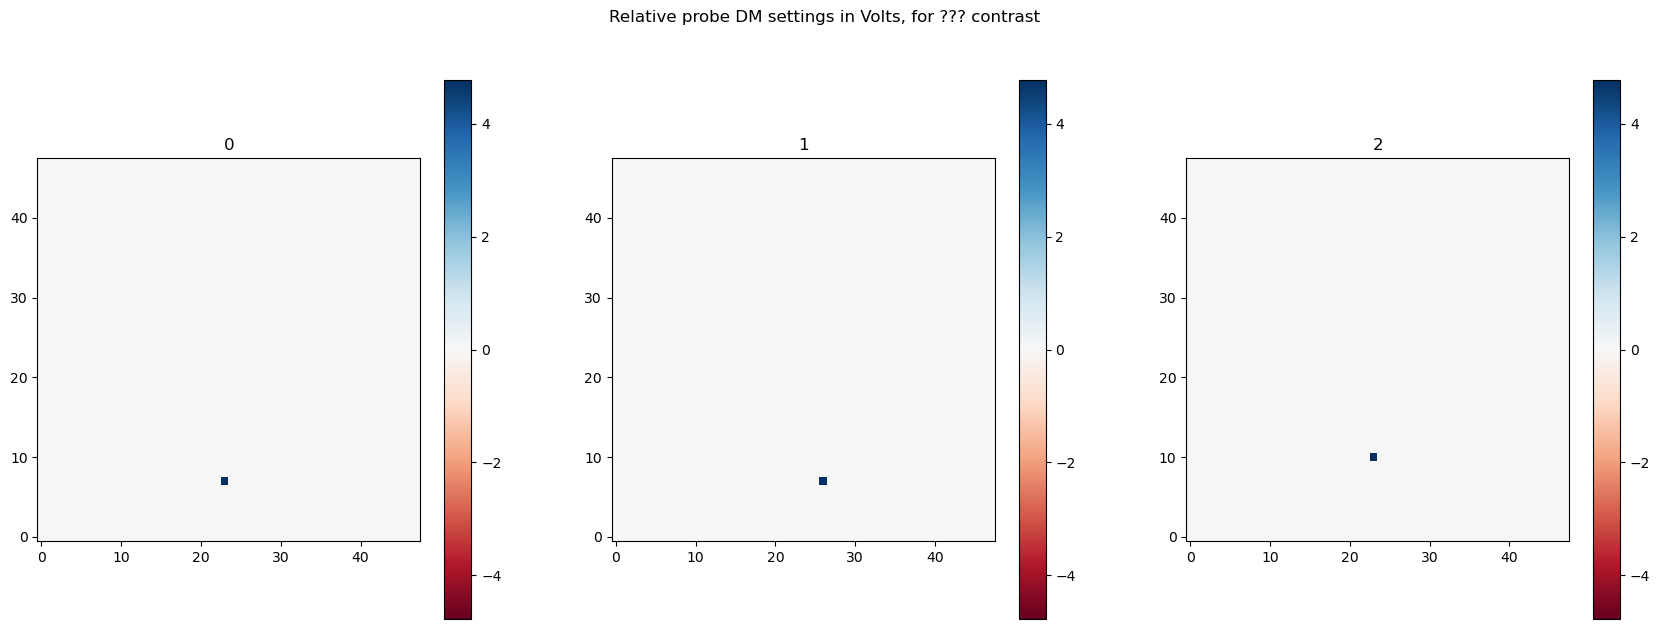

In [5]:
zeronorm = TwoSlopeNorm(vcenter=0, vmin=-np.max(act0probe), vmax=np.max(act0probe))

plt.figure(figsize=(21, 7))
plt.suptitle('Relative probe DM settings in Volts, for ??? contrast')

plt.subplot(1, 3, 1)
plt.imshow(act0probe, cmap='RdBu', origin='lower', norm=zeronorm)
plt.title('0')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(act1probe, cmap='RdBu', origin='lower', norm=zeronorm)
plt.title('1')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(act2probe, cmap='RdBu', origin='lower', norm=zeronorm)
plt.title('2')
plt.colorbar()


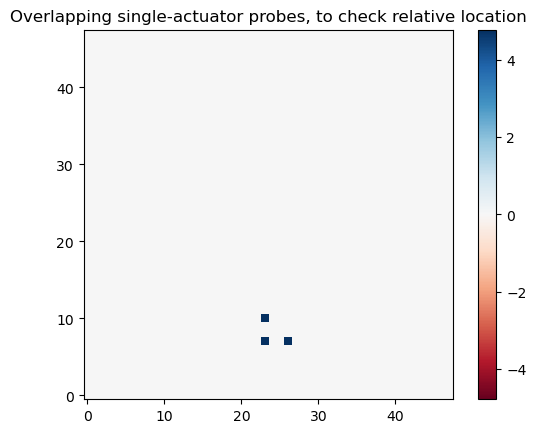

In [7]:
plt.imshow(act0probe + act1probe + act2probe, cmap='RdBu', origin='lower', norm=zeronorm)
plt.title('Overlapping single-actuator probes, to check relative location')
plt.colorbar()
fits.writeto('../../corgihowfsc/model/probes/narrowfov_dmrel_1.0e-05_L.fits', act0probe + act1probe + act2probe, overwrite=True)